In [39]:
# Training_model
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

#data Modelling
from sklearn.metrics  import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor




## Importing Data

In [42]:
#imprting dataset
df_students = pd.read_csv("/mnt/c/Users/hp/python_pipenv/Machine learning/stud.csv")
df_students.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
882,female,group B,high school,free/reduced,none,64,73,71
25,male,group A,master's degree,free/reduced,none,73,74,72


In [44]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [45]:
def missing_vals(df):
    '''
    A function to display the total numer of missing columns and the
    percentage of each missin values
    '''
    
    y = df.columns
    x = map(lambda x: round(df[x].isna().sum()/df.shape[0],2), y) #missing values
    z = map(lambda x: df[x].isna().sum(), y) #missung values percent
    
    # Appending Dataframes
    _first = pd.DataFrame(df.dtypes).T.rename(index ={0:'Column_type'})
    return  _first.append(pd.DataFrame({'Null_values':list(z), 'Percent': list(x)}, index = list(y)).T)
    

In [46]:
missing_vals(df_students)

/tmp/ipykernel_279/3119527629.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return  _first.append(pd.DataFrame({'Null_values':list(z), 'Percent': list(x)}, index = list(y)).T)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
Column_type,object,object,object,object,object,int64,int64,int64
Null_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#selecting Numerical and categorical columns
numerical_cols = df_students.select_dtypes(include = np.number).columns.tolist()
categorical_cols =  df_students.select_dtypes('object').columns.tolist()

In [51]:
print('Numerical columns include {}'.format(numerical_cols))
print('categorical columns include {}'.format(categorical_cols))


Numerical columns include ['math_score', 'reading_score', 'writing_score']
categorical columns include ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [52]:
# craeting  a copy of Dataset
df_students1 = df_students.copy()

## Preparing X and Y Variables

In [53]:
x,y = df_students1.drop('math_score', axis = 1), df_students['math_score'] 

In [55]:
x.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
737,female,group B,some college,free/reduced,completed,66,73
480,male,group B,high school,standard,completed,71,68


In [61]:
num_features = x.select_dtypes(exclude = 'object').columns
cat_features = x.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
            [
            ('OneHotEncoder', oh_transformer, cat_features),
            ('standardScaler', numeric_transformer, num_features),
                
            ]
                    )




In [62]:
x = preprocessor.fit_transform(x)

In [64]:
x.shape

(1000, 19)

In [70]:
#seprate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [73]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [85]:
#creating metric function
def evaluate_model(true, predicted):
    '''
    This is a function to return the error metrics
    '''
    mae =  mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae,rmse,r2_square

In [92]:
models = {
        'Linear_Regression': LinearRegression(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'K-Neighbors Regressor': KNeighborsRegressor(),
        'Decision_Tree_Regressor': DecisionTreeRegressor(),
        'Random_Forest_Regressor': RandomForestRegressor(),
        'XGBregressor': XGBRegressor(),
        'Catoosting_REgressor': CatBoostRegressor(verbose = False),
        'AdaBoost Regressor': AdaBoostRegressor()
    
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train_model
    
    #make_predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Performances for Training set')
    print(' - Root Mean squared Errror: {:.4f}'.format(model_train_rmse))
    print(' - Mean Absolute Errror: {:.4f}'.format(model_train_mae))
    print(' -r2 score: {:.4f}'.format(model_train_rmse))
    
    print('-----------------------')
    
    print('Model Performances for Test set')
    print(' - Root Mean squared Errror: {:.4f}'.format(model_test_rmse))
    print(' - Mean Absolute Errror: {:.4f}'.format(model_test_mae))
    print(' -r2 score: {:.4f}'.format(model_test_rmse))
    r2_list.append(model_test_r2)
    
    print('=' *35)# separator
    print('\n')# newline
    
        
    
    

Linear_Regression
Model Performances for Training set
 - Root Mean squared Errror: 5.3231
 - Mean Absolute Errror: 4.2667
 -r2 score: 5.3231
-----------------------
Model Performances for Test set
 - Root Mean squared Errror: 5.3940
 - Mean Absolute Errror: 4.2148
 -r2 score: 5.3940


Lasso
Model Performances for Training set
 - Root Mean squared Errror: 6.5938
 - Mean Absolute Errror: 5.2063
 -r2 score: 6.5938
-----------------------
Model Performances for Test set
 - Root Mean squared Errror: 6.5197
 - Mean Absolute Errror: 5.1579
 -r2 score: 6.5197


Ridge
Model Performances for Training set
 - Root Mean squared Errror: 5.3233
 - Mean Absolute Errror: 4.2650
 -r2 score: 5.3233
-----------------------
Model Performances for Test set
 - Root Mean squared Errror: 5.3904
 - Mean Absolute Errror: 4.2111
 -r2 score: 5.3904


K-Neighbors Regressor
Model Performances for Training set
 - Root Mean squared Errror: 5.7088
 - Mean Absolute Errror: 4.5177
 -r2 score: 5.7088
---------------------

# Results

In [93]:
#results

pd.DataFrame(list(zip(model_list,r2_list)), columns = ['model_name', 'R2_score' ]).sort_values(by = ['R2_score'], ascending = False)

,model_name,R2_score
2,Ridge,0.880593
0,Linear_Regression,0.880433
5,Random_Forest_Regressor,0.852999
7,Catoosting_REgressor,0.851632
8,AdaBoost Regressor,0.850830
1,Lasso,0.825320
6,XGBregressor,0.821589
3,K-Neighbors Regressor,0.784030
4,Decision_Tree_Regressor,0.753779


# Linear Regression

In [94]:
lin_model =LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f' % score)

Accuracy of the model is 88.04


Text(0, 0.5, 'predicted')

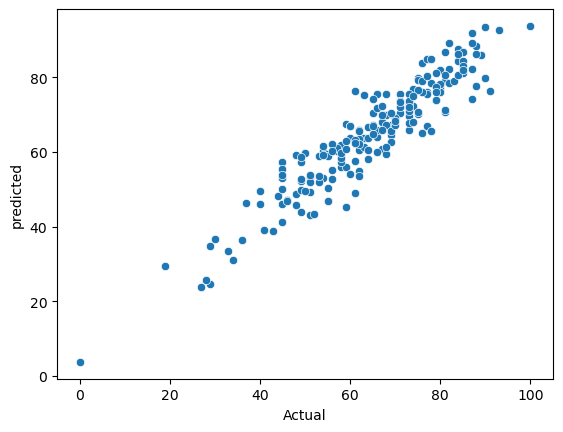

In [98]:
sns.scatterplot(x = y_test, y= y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<Axes: xlabel='math_score'>

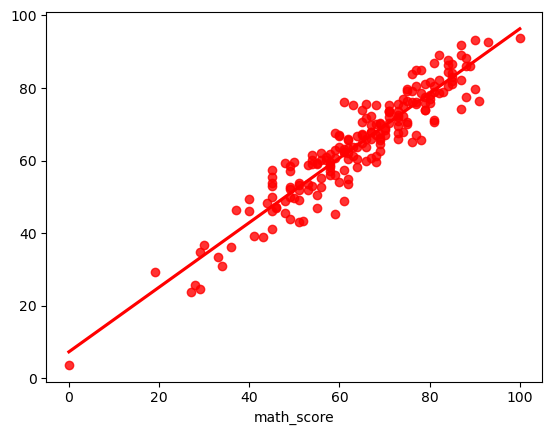

In [100]:
sns.regplot(x = y_test, y= y_pred, ci = None, color = 'red')

In [102]:
pred_df = pd.DataFrame({'Actual Values': y_test, 'Predicted value': y_pred, 'Difference':y_test - y_pred})
pred_df

,Actual Values,Predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
